## PROBLEM STATEMENT

### 1.Business Understanding

<ol>A company in kenya named Tokyo wants to offer loans to its customers.To do so they requested a data scientist to perform analysis of their data to determine the credit worthiness of a customer based on historical data features whether customer will default or not.</ol>

<ol>In order to do that i got upto task to do credit scoring analysis.I used CRISP-DM -CROSS INDUSTRY STANDARD PROCESS FOR DATA MINING APPROACH</ol>

<ol>Dataset contains 11 columns:
    <ul>job category 0-non-skilled,1-slightly skilled,-2-skilled,3-highly skilled</ul></ol>

### 2.Data Understanding

In [2]:
#importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC #SUPPORT VECTOR MACHINES
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score,recall_score,precision_score,confusion_matrix

In [3]:
#loading dataset
df=pd.read_csv('german_credit_data (3).csv')

In [4]:
# previewing first 5 records
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
# previewing last 5 records
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [6]:
#sampling data
df.sample()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
660,660,23,male,2,rent,little,rich,1297,12,radio/TV,good


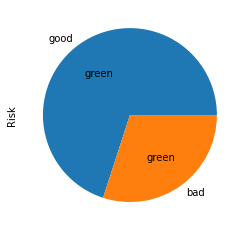

In [7]:
#previewing target variable
df['Risk'].value_counts().plot(kind='pie',autopct='green')

In [8]:
#checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
#checking columns
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [10]:
#cheking shape or number of record in the data
df.shape

(1000, 11)

In [11]:
#checking datatypes of data
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [12]:
#conver4ting column names intolower_case
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## 3.Data Preparation and Analysis

### Data exploration and cleaning

In [13]:
#checking missing data
df.isna().sum()

unnamed:_0            0
age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

obsv:There are mising valuea in savings and checking

In [14]:
# treating missing values with none to indicate no checking or saving account
df['saving_accounts'].fillna('None',inplace=True)
df['checking_account'].fillna('None',inplace=True)

In [15]:
df.isna().sum()

unnamed:_0          0
age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
purpose             0
risk                0
dtype: int64

In [16]:
#we drop unwanted columns 'unnamed'
df.drop(columns=['unnamed:_0'],axis=1,inplace=True)

In [17]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,None,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,None,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [18]:
#checking duplicated values
df.duplicated().any()

False

###### no duplicates

In [19]:
#checking unique values
df.nunique()

age                  53
sex                   2
job                   4
housing               3
saving_accounts       5
checking_account      4
credit_amount       921
duration             33
purpose               8
risk                  2
dtype: int64

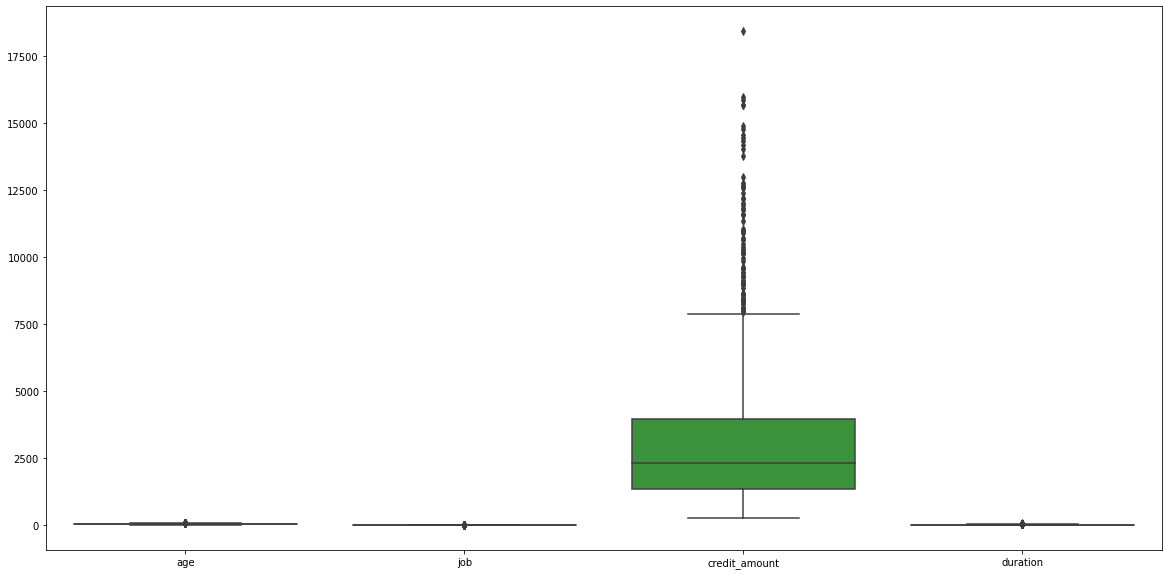

In [20]:
#checking outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

#### credit amount has outliers

In [21]:
#treating outliers
#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(df['credit amount']))
#print(z)
#threshold = 5
#print(np.where(z > 5))

## Univariate Analysis

In [22]:
#checking summary statistics for numericals
df.describe()

,age,job,credit_amount,duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [23]:
#checking summary statistics for numericals and non-numeric vales
df.describe(include='all')

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
count,1000.000000,1000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,5,4,NaN,NaN,8,2
top,NaN,male,NaN,own,little,None,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,394,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


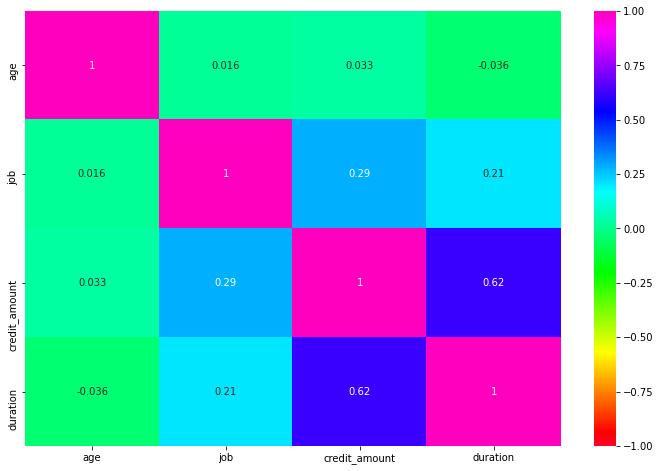

In [24]:
#performing correlation between diffrent varaibles
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='gist_rainbow',vmin=-1,vmax=1)

 credit amount and duration has highest correlaion hencestrongly vorrelated

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


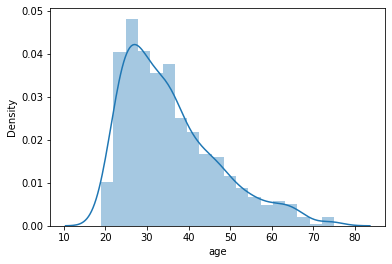

In [25]:
# age
sns.distplot(df['age'])

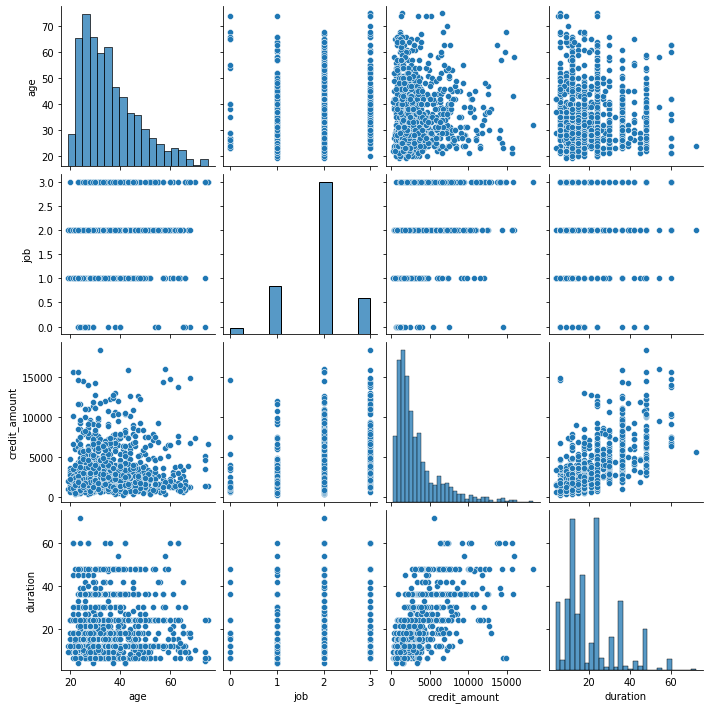

In [26]:
sns.pairplot(df)

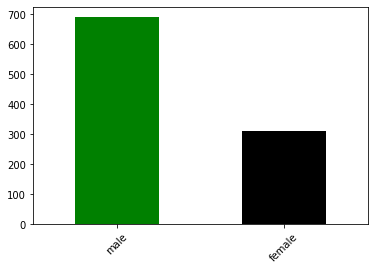

In [27]:
#gender
df['sex'].value_counts().plot(kind='bar',color={'black','green'},rot=45)

#### male gender is higher in the company

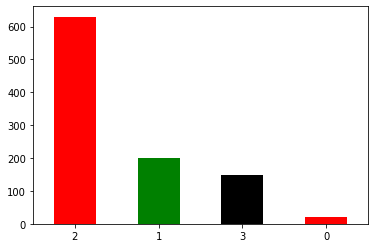

In [28]:
#job
df['job'].value_counts().plot(kind='bar',color={'black','green','red'},rot=0)

#### most customers are skilled based on our analysis

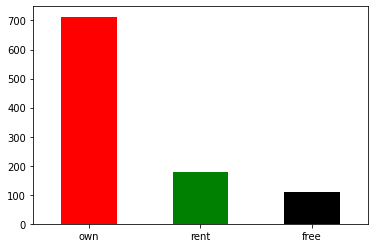

In [29]:
#housing
df['housing'].value_counts().plot(kind='bar',color={'black','green','red'},rot=0)

#### Most customers own their houses

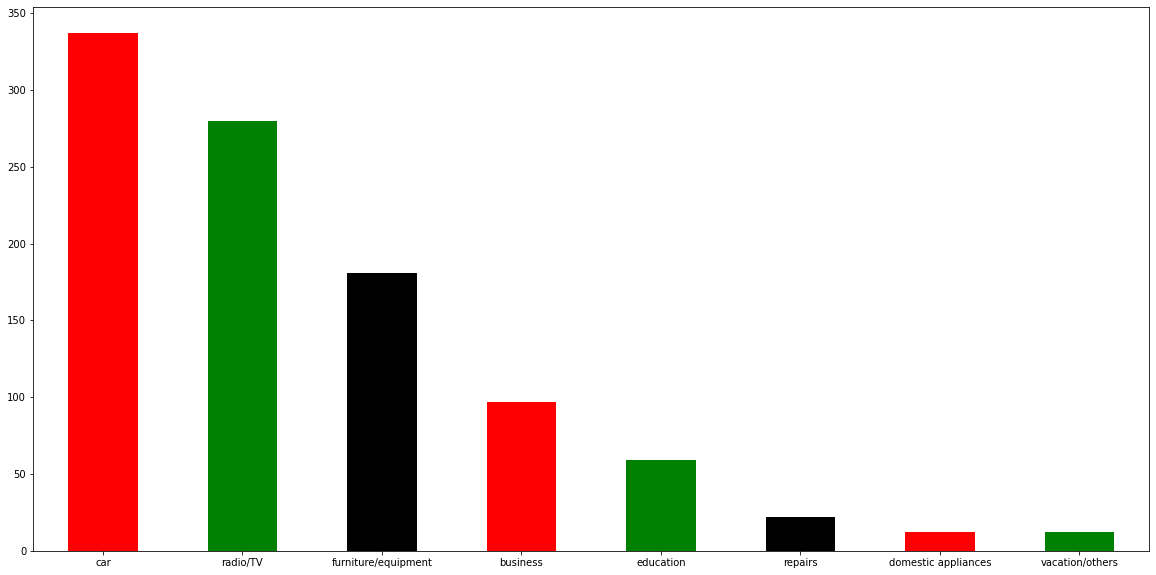

In [30]:
#puropse of loan
plt.figure(figsize=(20,10))
df['purpose'].value_counts().plot(kind='bar',color={'black','green','red'},rot=0)

#### based on our analysis most customers apply loans to buy cars

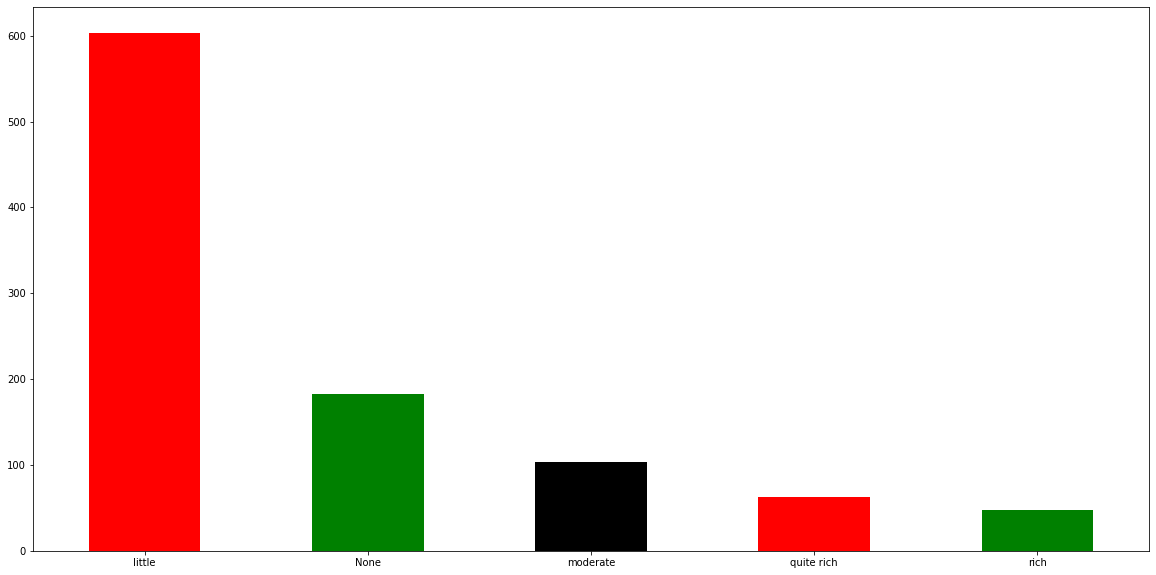

In [31]:
#saving accounts
plt.figure(figsize=(20,10))
df['saving_accounts'].value_counts().plot(kind='bar',color={'black','green','red'},rot=0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


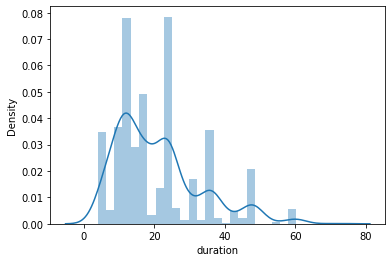

In [32]:
#duration of loan payment
sns.distplot(df['duration'])

### most customers like to pay between 13-20 months

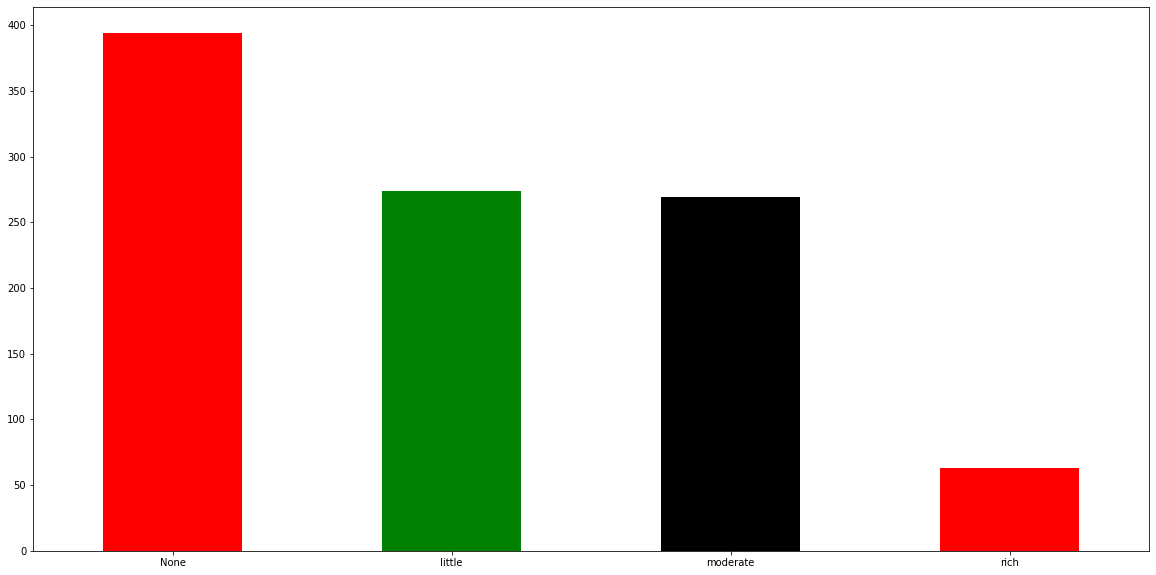

In [33]:
#checking accounts
plt.figure(figsize=(20,10))
df['checking_account'].value_counts().plot(kind='bar',color={'black','green','red'},rot=0)

#### Those who dont have account account for higher percentage

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


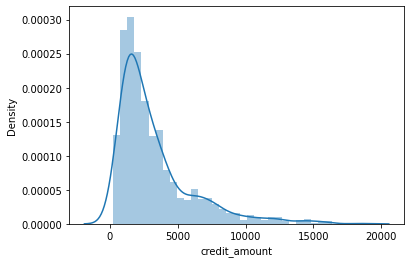

In [34]:
sns.distplot(df['credit_amount'])

## Bivarate Analysis With Target Variable

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


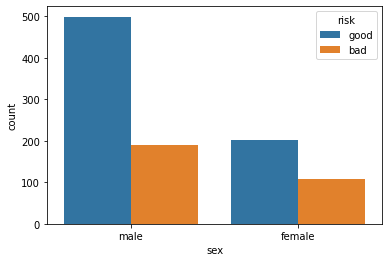

In [35]:
#sex and risk
sns.countplot(df['sex'],hue='risk',data=df)

#### obs:we cant say which gender will default or not

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


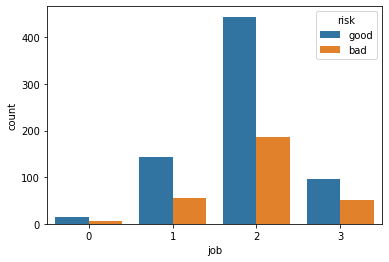

In [36]:
#job and risk
sns.countplot(df['job'],hue='risk',data=df)

#### skilled people are more likely to pay loan

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


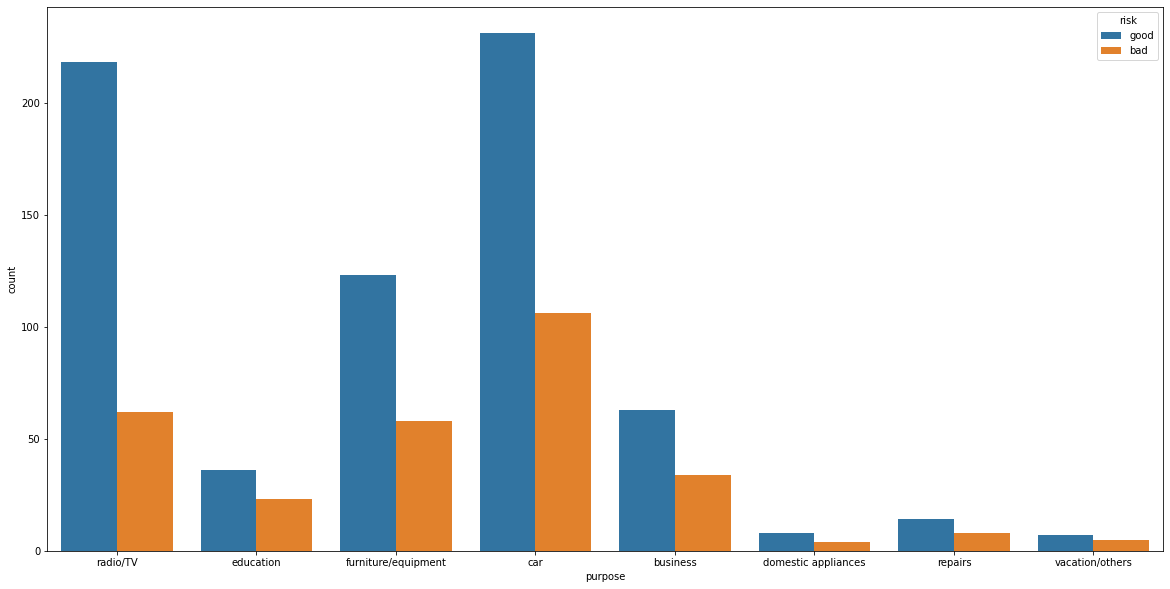

In [37]:
#purpose and risk
plt.figure(figsize=(20,10))
sns.countplot(df['purpose'],hue='risk',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


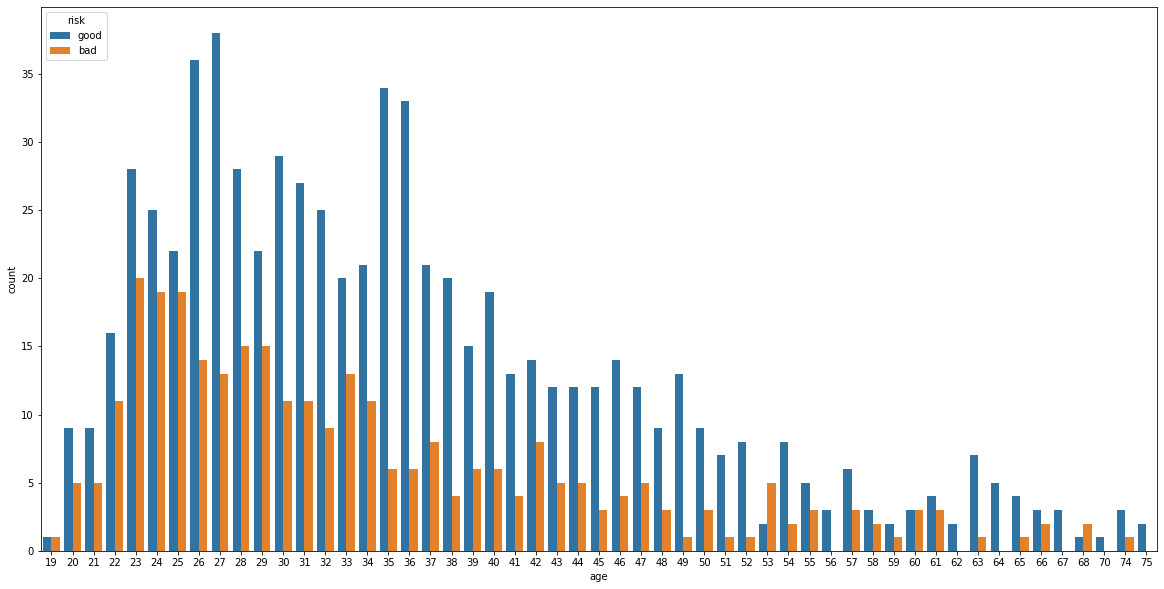

In [38]:
#age and risk
plt.figure(figsize=(20,10))
sns.countplot(df['age'],hue='risk',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


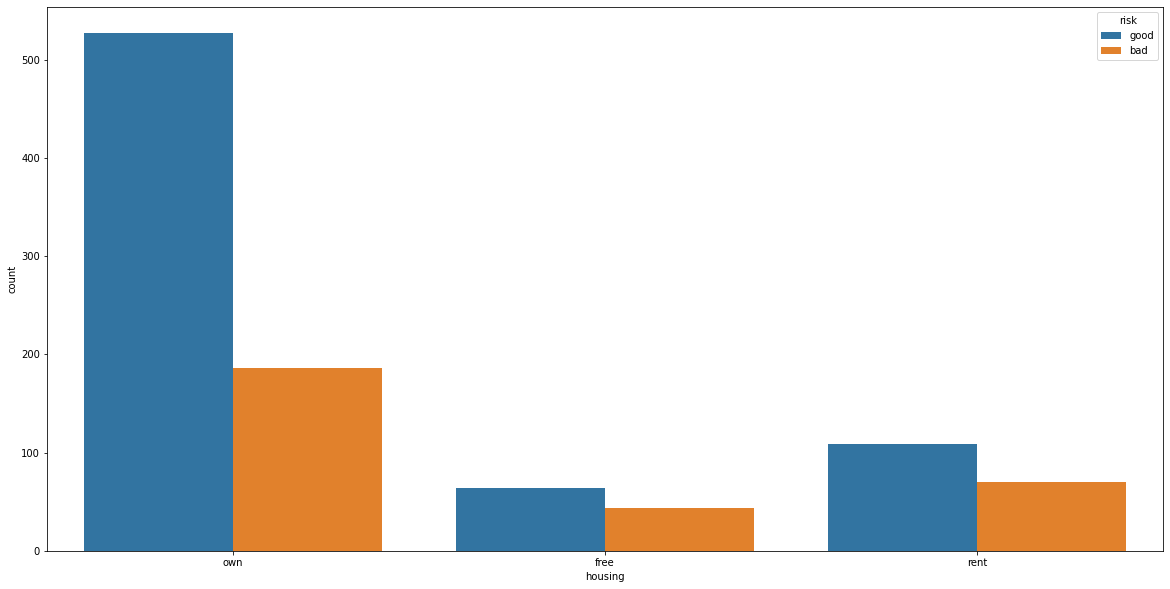

In [39]:
#job	housing	saving accounts	checking account	credit amount	durat
#housing and risk
plt.figure(figsize=(20,10))
sns.countplot(df['housing'],hue='risk',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


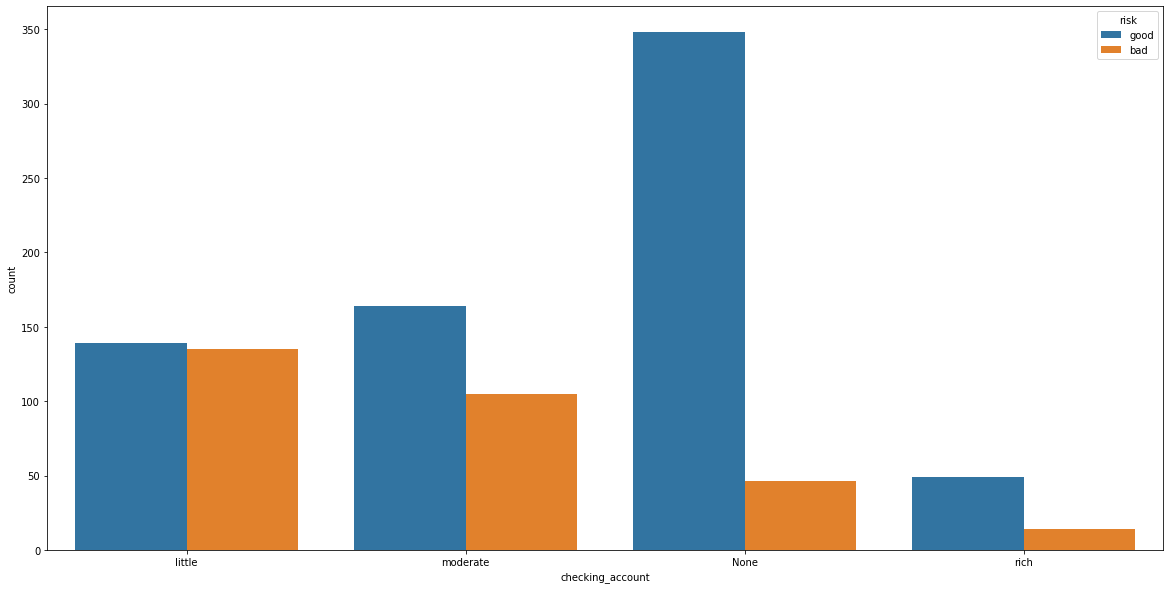

In [40]:
#checking account and risk
plt.figure(figsize=(20,10))
sns.countplot(df['checking_account'],hue='risk',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


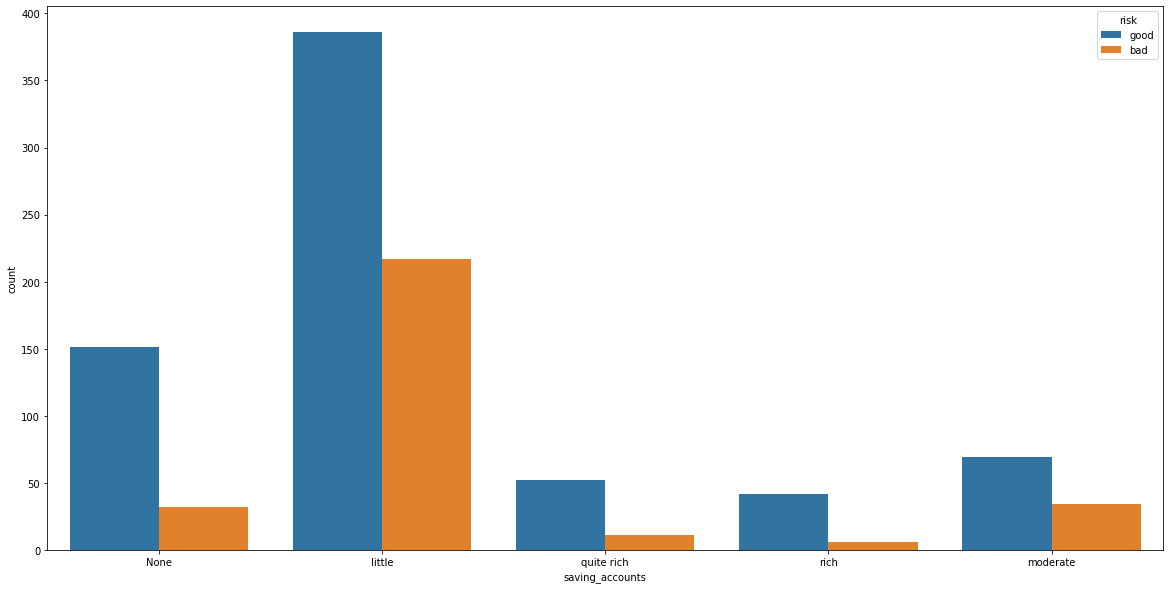

In [41]:
#savinging account and risk
plt.figure(figsize=(20,10))
sns.countplot(df['saving_accounts'],hue='risk',data=df)

#### OBSV: based on the analysis  customers with  little savings account has highe risk of defaulting

In [42]:
df.purpose.value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: purpose, dtype: int64

### Preprocessing the Data

In [43]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# LabelBinarizer converts the string categorical variable to binary 
from sklearn.preprocessing import LabelBinarizer
lb= LabelBinarizer()
df["risk"]= lb.fit_transform(df["risk"])

 In order to prepare our dataset for our model, we will perform binning on the numerical variables i.e. duration, age and credit amount variables. Once we perform binning, we will later perform one hot encoding to all the categorical variables within our dataset.
 

In [44]:
# performing binning on duration 
# we bin by specifying 6 bins
df["duration"] = pd.qcut(df.duration, q = 6)
# performing binning on age
# we bin by defining the intervals and categories
interval = (18, 25, 35, 60, 120)
categories = ['student', 'youth', 'adult', 'senior']
df["age"] = pd.cut(df.age, interval, labels = categories)
# performing binning on credit_amount
# this time we bin without specifying i.e. we create 6 bins
df["credit_amount"] = pd.qcut(df.credit_amount, q = 5)

In [45]:
#converting categorical to numbers using oner-hot encoding
#male=1,Female=0
#df['sex']=df['sex'].map({'male':1,'female':0})

#housing :own=0,free=1,rent=2
#df['housing']=df['housing'].map({'free':1,'own':0,'rent':2})
# svings account litte=1,moderate=2,None=0,rich=3,quiterich=4
#df['saving accounts']=df['saving accounts'].map({'little':1,'None':0,'moderate':2,'rich':3,'quite rich':4})
# checking account litte=1,moderate=2,None=0,rich=3
#df['checking account']=df['checking account'].map({'little':1,'None':0,'moderate':2,'rich':3})
#purpose
# performing one hot encoding to the purpose variable
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)
# performing one hot encoding to the purpose variable
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
# performing one hot encoding to the sex variable
df = df.merge(pd.get_dummies(df.sex, drop_first=True, prefix='sex'), left_index=True, right_index=True)
# performing one hot encoding to the housing variable
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
# performing one hot encoding to the savings account variable
df = df.merge(pd.get_dummies(df.saving_accounts, drop_first=True, prefix='savings'), left_index=True, right_index=True)
# performing one hot encoding to checking account variable
df = df.merge(pd.get_dummies(df.checking_account, drop_first=True, prefix='check'), left_index=True, right_index=True)
# performing one hot encoding to age variable
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
# performing one hot encoding to age variable
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)
# performing one hot encoding to credit amount variable
df = df.merge(pd.get_dummies(df.credit_amount, drop_first=True, prefix='credit_amount'), left_index=True, right_index=True)

In [46]:
# we then cxcluding the missing columns since we have new variables for use
del df["job"]
del df["purpose"]
del df["sex"]
del df["housing"]
del df["saving_accounts"]
del df["checking_account"]
del df["age"]
del df["duration"]
del df["credit_amount"]

In [47]:
df.head()

,risk,job_1,job_2,job_3,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,sex_male,housing_own,housing_rent,savings_little,savings_moderate,savings_quite rich,savings_rich,check_little,check_moderate,check_rich,age_youth,age_adult,age_senior,"duration_(10.0, 12.0]","duration_(12.0, 18.0]","duration_(18.0, 24.0]","duration_(24.0, 36.0]","duration_(36.0, 72.0]","credit_amount_(1262.0, 1906.8]","credit_amount_(1906.8, 2852.4]","credit_amount_(2852.4, 4720.0]","credit_amount_(4720.0, 18424.0]"
0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [48]:
#scaler=StandardScaler()
#df=scaler.fit_transform(df)
   

## 4.MODELING

In [49]:
#predictor variables
X=df.drop(columns=['risk'],axis=1)
#target variable
y=df.risk
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=0,test_size=0.2)

# creating a balanced dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train,y_train=smt.fit_sample(X_train,y_train)

# we check the amount of records in each category
np.bincount(y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([560, 560])

#### logistic regression

In [50]:
log=LogisticRegression()
#fitting model
log.fit(X_train,y_train)
#predictions
prediction=log.predict(X_test)
#checking accuracy
print(accuracy_score(prediction,y_test))
print(confusion_matrix(y_test,prediction))

0.735
[[ 19  41]
 [ 12 128]]


#### RandomForestClasifier

In [51]:
ran=RandomForestClassifier()
#fitting model
ran.fit(X_train,y_train)
#predictions
prediction=ran.predict(X_test)
#checking accuracy
print(accuracy_score(prediction,y_test))
print(confusion_matrix(y_test,prediction))

0.69
[[ 20  40]
 [ 22 118]]


#### Neural Networks

In [52]:
# importing libraries
import keras
from keras.models import Sequential     # Used to initialize the Artificial Neural Network
from keras.layers import Dense          # Used to build the hidden Layers
from keras.layers import Dropout        # Used to prevent overfitting

# creating an instance 
classifier = Sequential() 

# adding hidden layers
classifier.add(Dense(units = 100, input_dim = 32, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 100, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))

# output layer
classifier.add(Dense(units = 1, activation = "sigmoid"))

# compiling our model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# training our model
classifier.fit(X_train, y_train, epochs = 500, batch_size = 32)

Epoch 1/500
35/35 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.5518
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.6973
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7554
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7652
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7732
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7741
Epoch 7/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.7741
Epoch 8/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.7759
Epoch 9/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.7911
Epoch 10/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8009
Epoch 11/

In [54]:
# model evaluation
loss, accuracy = classifier.evaluate(X_test, y_test)
print('ANN Accuracy:', accuracy)


7/7 [==============================] - 0s 2ms/step - loss: 1.9983 - accuracy: 0.6550
ANN Accuracy: 0.6549999713897705


#### LOGISTIC REGRESSION OUTPERFORMS ALL OTHER MODELS THATS WHY ITS MOSTLY USED!